# <b>Life Expectancy and GDP

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Make a dataFrame

In [2]:
df = pd.read_csv('all_data.csv')

## Data Inspection

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Missing values and duplicates

In [6]:
missing_values = df.isnull().sum()
duplicated_values = df.duplicated().sum()
print("missing_values:\n", missing_values)
print("duplicated_values:\n", duplicated_values)

missing_values:
 Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64
duplicated_values:
 0


## <b>Visualisations

### Univariate analysis

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


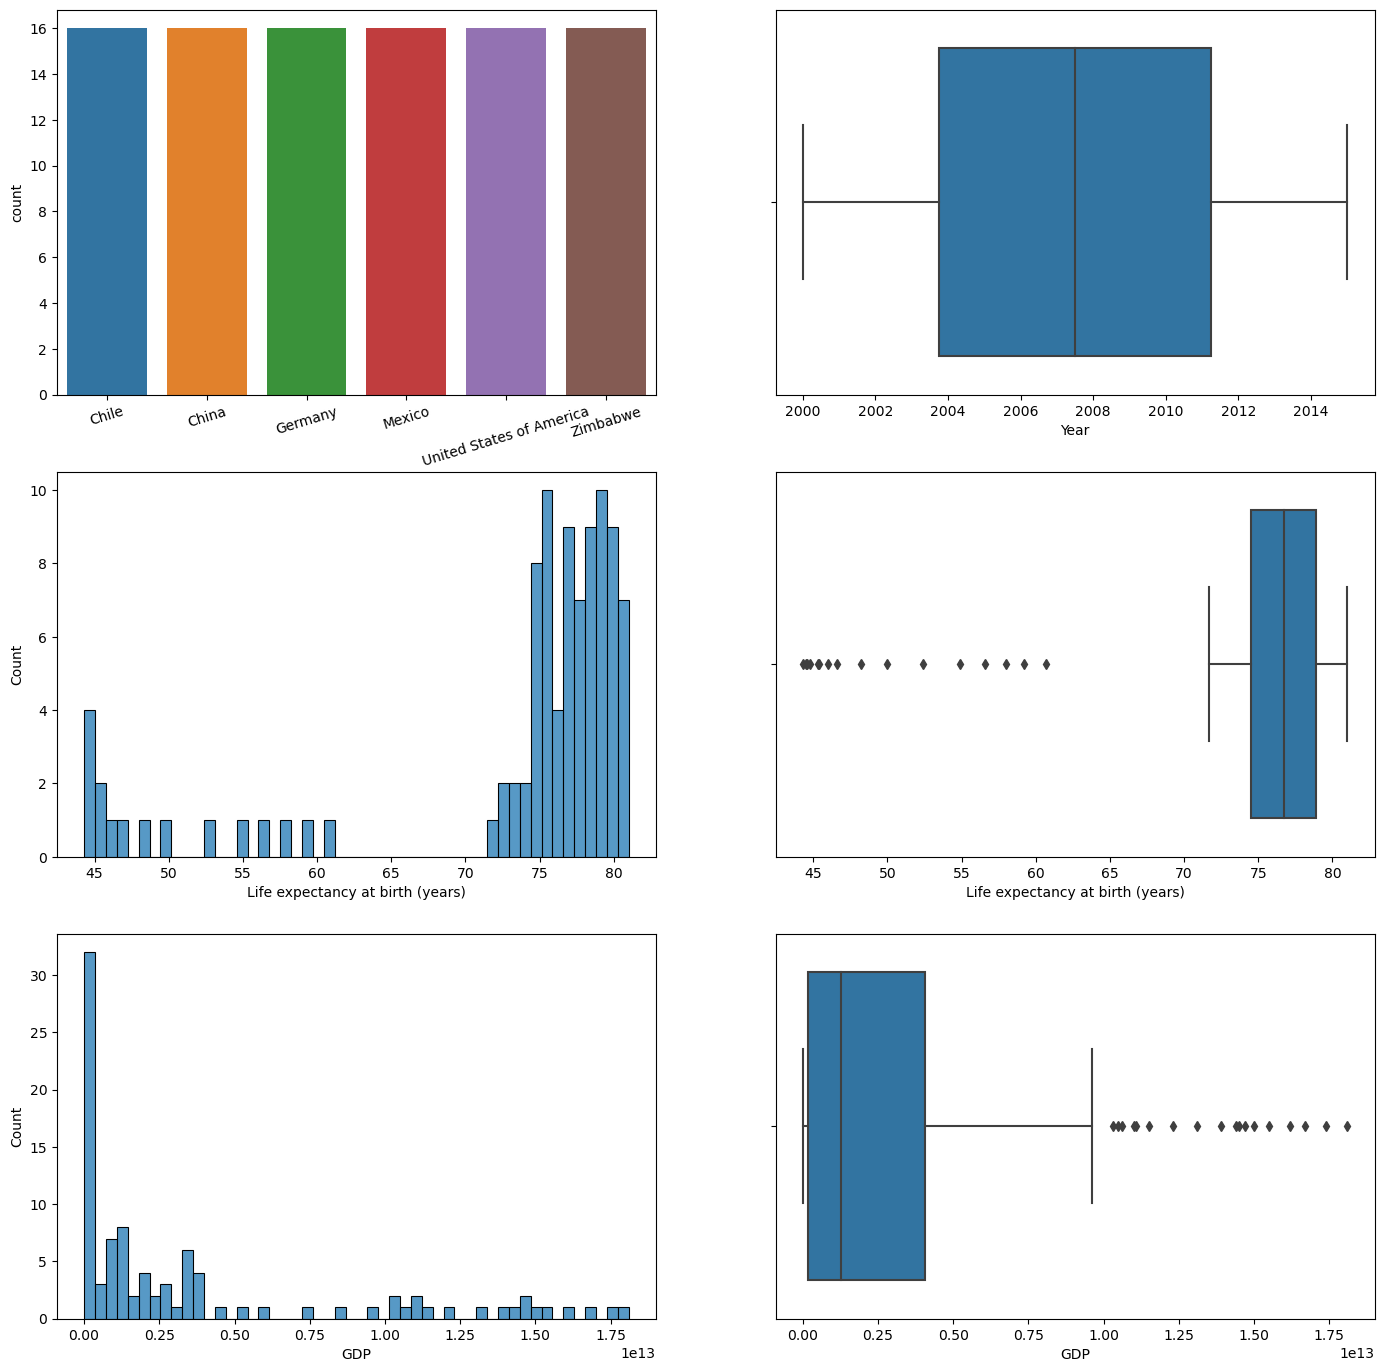

<Figure size 640x480 with 0 Axes>

In [8]:
country_count = df['Country'].value_counts()
print(country_count)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17, 17))

sns.countplot(x="Country", data=df, ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=17)

sns.boxplot(x='Year', data=df, ax=axes[0, 1])

sns.histplot(df['Life expectancy at birth (years)'], bins=50, ax=axes[1, 0])
sns.boxplot(x='Life expectancy at birth (years)', data=df, ax=axes[1, 1])

sns.histplot(df['GDP'], bins=50, ax=axes[2, 0])
sns.boxplot(x='GDP', data=df, ax=axes[2, 1])


plt.show()
plt.clf()

## Change in GDP by country over time

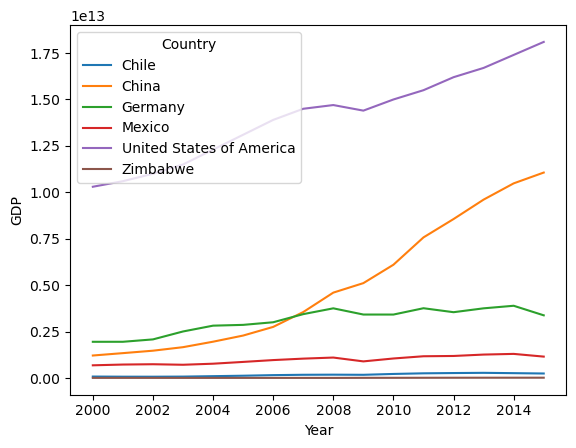

<Figure size 640x480 with 0 Axes>

In [9]:
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', palette='tab10')
plt.show()
plt.clf()

## Change life expectency over time

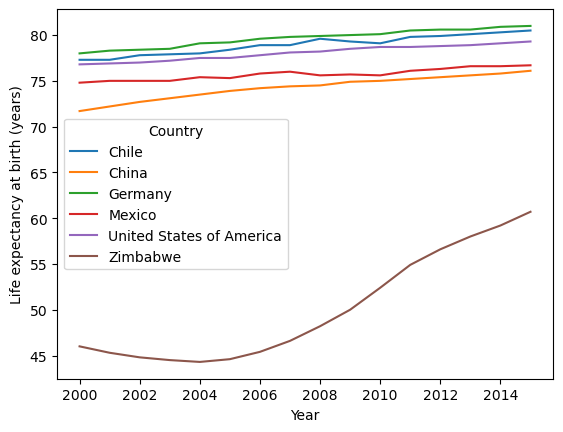

<Figure size 640x480 with 0 Axes>

In [10]:
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country', palette='tab10')
plt.show()
plt.clf()

## Is there a correlation between GDP and life expectancy?

In [14]:
correlation, p_value = stats.pearsonr(df['GDP'], df['Life expectancy at birth (years)'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.343206748449156
P-value: 0.0006187129569469811


<b>Correlation</b>
* The correlation coefficient is approximately 0.34.
* This value indicates a moderate positive linear relationship between GDP and life expectancy. As GDP increases, life expectancy tends to increase as well, but this relationship is not very strong.

<b>P-value</b>
* The p-value is approximately 0.00062.
* This value is used to determine the statistical significance of the correlation coefficient. Typically, a p-value of less than 0.05 is considered statistically significant.
* In our case, the p-value is well below 0.05, suggesting that the observed correlation between GDP and life expectancy is statistically significant and not likely due to random chance.

However, it's important to remember that correlation does not imply causation. While GDP and life expectancy are related, this does not necessarily mean that changes in GDP directly cause changes in life expectancy. Other factors might be influencing both, or the relationship might be more complex than a simple linear correlation.

## What is the average life expectancy in these nations?

In [25]:
average_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values(ascending=False)
average_life_expectancy

Country
Germany                     79.65625
Chile                       78.94375
United States of America    78.06250
Mexico                      75.71875
China                       74.26250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64